# **SPORTSPERSON RECOGNITION**

In [1]:
#importing libraries
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/serena1.jpg')
img.shape

(1865, 2486, 3)

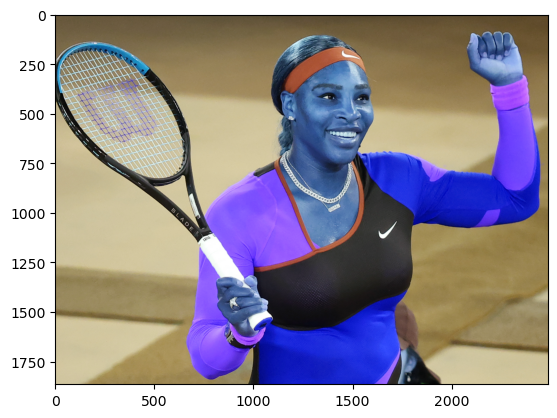

In [3]:
plt.imshow(img)

In [4]:
#removing RGB
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1865, 2486)

In [5]:
gray

array([[ 83,  84,  82, ...,  66,  66,  65],
       [ 83,  83,  82, ...,  67,  66,  65],
       [ 83,  82,  82, ...,  68,  67,  66],
       ...,
       [188, 188, 188, ..., 190, 189, 184],
       [188, 188, 187, ..., 189, 187, 183],
       [188, 189, 187, ..., 189, 187, 184]], dtype=uint8)

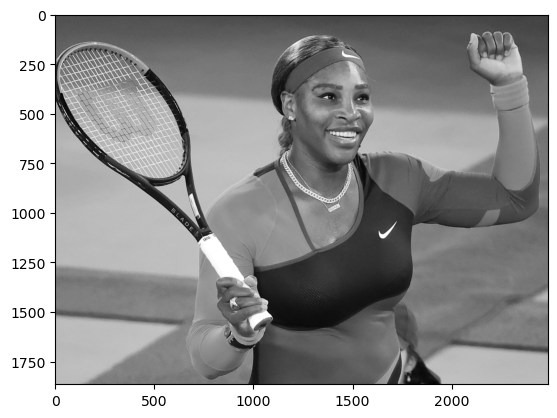

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
#detecting face from opencv-haarcascade
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1252,  254,  430,  430]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(1252, 254, 430, 430)

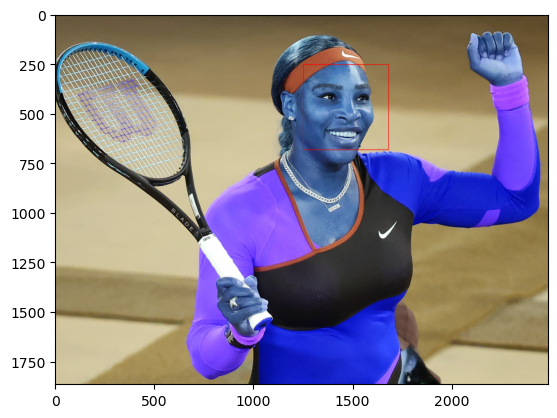

In [9]:
#drawing a rectangle around the detected face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

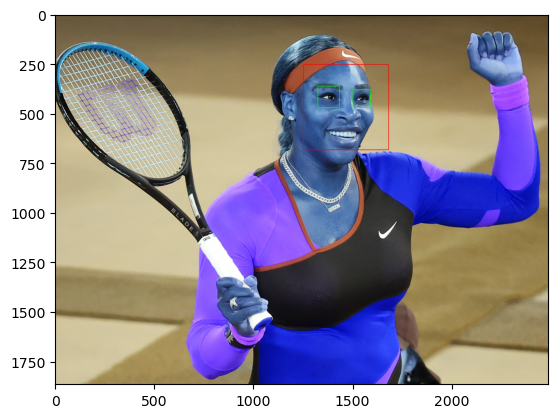

In [10]:
#detecting eyes- code from opencv documentation
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


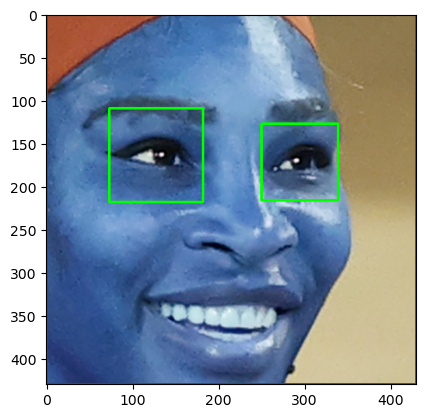

In [11]:
#cropping the face part - ROI(Region of Interest
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(430, 430, 3)

In [73]:
#function that returns cropped image (if face and eyes >=2 are detected)
    
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

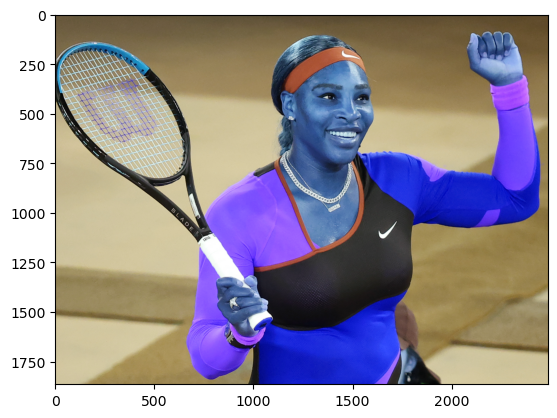

In [74]:
original_image = cv2.imread('./test_images/serena1.jpg')
plt.imshow(original_image)

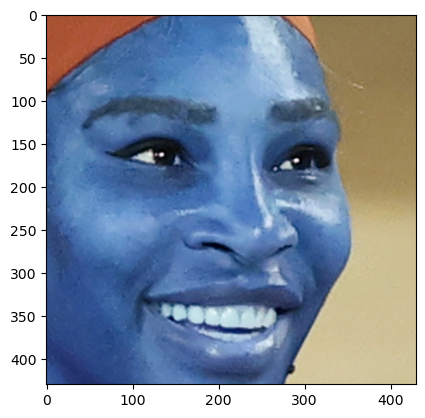

In [75]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/serena1.jpg')
plt.imshow(cropped_image)

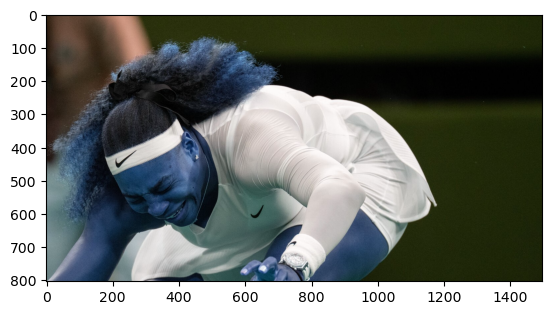

In [76]:
#ignoring images with unclear eyes
org_image_obstructed = cv2.imread('./test_images/serena.jpg')
plt.imshow(org_image_obstructed)

In [77]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/serena.jpg')
cropped_image_no_2_eyes

In [81]:
#creating a folder for cropped images
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [82]:
#storing names of subdirectory in a python list
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [83]:
img_dirs

['./dataset/cristiano ronaldo',
 './dataset/cropped',
 './dataset/lionel messi',
 './dataset/sachin tendulkar',
 './dataset/serena williams',
 './dataset/virat kohli']

In [84]:
#creating a cropped folder
import shutil
if os.path.exists(path_to_cr_data): #removing any existing folder of the same name
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [85]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/cristiano ronaldo
Generating cropped images in folder:  ./dataset/cropped/lionel messi
Generating cropped images in folder:  ./dataset/cropped/sachin tendulkar
Generating cropped images in folder:  ./dataset/cropped/serena williams
Generating cropped images in folder:  ./dataset/cropped/virat kohli


In [86]:
#wavelet transform as a feature for traning model
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

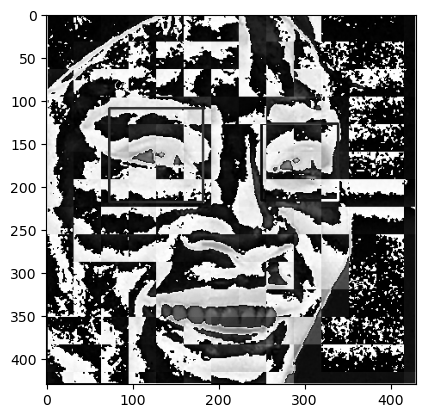

In [87]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [118]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano ronaldo': ['./dataset/cropped/cristiano ronaldo\\cristiano ronaldo1.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo10.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo11.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo12.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo13.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo14.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo15.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo16.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo17.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo18.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo19.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo2.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo20.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo21.jpg',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo

In [119]:
#assignming every celebrity's name to a number in a dictionary
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano ronaldo': 0,
 'lionel messi': 1,
 'sachin tendulkar': 2,
 'serena williams': 3,
 'virat kohli': 4}

In [120]:
#stacking original image over wavelet transformed image 
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [121]:
len(X)

153

In [122]:
len(X[0])

4096

In [123]:
X[0]

array([[ 13],
       [ 17],
       [ 18],
       ...,
       [159],
       [  3],
       [ 32]], dtype=uint8)

In [124]:
y[0]

0

In [125]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(153, 4096)

## Training the model


In [100]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [127]:
len(X_test)

39

In [128]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.67      0.89      0.76         9
           2       1.00      0.50      0.67         8
           3       0.60      0.43      0.50         7
           4       0.71      0.83      0.77         6

    accuracy                           0.67        39
   macro avg       0.71      0.66      0.66        39
weighted avg       0.70      0.67      0.66        39



In [104]:
#GridSearch on different models with different paramets to get best model with best fine tuned parameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [129]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [130]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.710672,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.570356,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.720158,{'logisticregression__C': 1}


In [131]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [132]:
best_estimators['svm'].score(X_test,y_test)

0.8461538461538461

In [133]:
best_estimators['random_forest'].score(X_test,y_test)

0.46153846153846156

In [134]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8205128205128205

In [135]:
best_clf = best_estimators['svm']

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 1, 1, 0, 0],
       [0, 8, 0, 1, 0],
       [0, 0, 6, 1, 1],
       [0, 0, 0, 7, 0],
       [0, 0, 0, 1, 5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

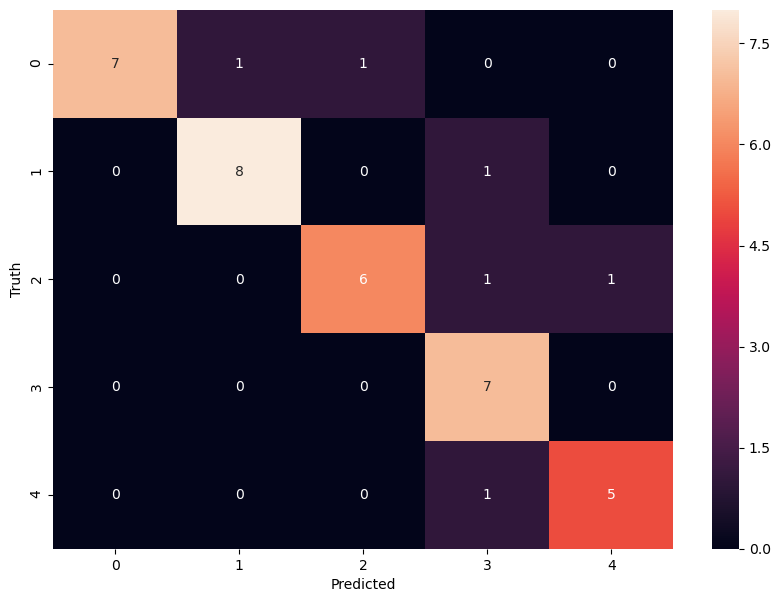

In [141]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [138]:
class_dict

{'cristiano ronaldo': 0,
 'lionel messi': 1,
 'sachin tendulkar': 2,
 'serena williams': 3,
 'virat kohli': 4}

In [139]:
#saving the trained model
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [140]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))